<a href="https://colab.research.google.com/github/Techdevweb/Fetal-State-Predictor_forked/blob/main/AI_CLUB_PROJECT-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
path ="https://raw.githubusercontent.com/MSU-AI/Fetal-State-Predictor/main/AI_Club_2.csv"

In [3]:
data = pd.read_csv(path,encoding='unicode_escape')

In [4]:
data

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,12/1/96,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,5/3/96,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/96,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/96,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,S8001045.dsp,6/6/98,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2126,S8001045.dsp,6/6/98,CTG2128.txt,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.isnull().sum()

FileName    4
Date        4
SegFile     4
b           4
e           4
LBE         4
LB          4
AC          4
FM          3
UC          3
ASTV        3
MSTV        3
ALTV        3
MLTV        3
DL          2
DS          2
DP          2
DR          2
Width       4
Min         4
Max         4
Nmax        4
Nzeros      4
Mode        4
Mean        4
Median      4
Variance    4
Tendency    4
A           4
B           4
C           4
D           4
E           4
AD          4
DE          4
LD          4
FS          4
SUSP        4
CLASS       4
NSP         4
dtype: int64

In [6]:
miss_value=['N/a','na','NaN',np.nan]
data = pd.read_csv(path,na_values=miss_value)
data.isnull().sum()

FileName    4
Date        4
SegFile     4
b           4
e           4
LBE         4
LB          4
AC          4
FM          3
UC          3
ASTV        3
MSTV        3
ALTV        3
MLTV        3
DL          2
DS          2
DP          2
DR          2
Width       4
Min         4
Max         4
Nmax        4
Nzeros      4
Mode        4
Mean        4
Median      4
Variance    4
Tendency    4
A           4
B           4
C           4
D           4
E           4
AD          4
DE          4
LD          4
FS          4
SUSP        4
CLASS       4
NSP         4
dtype: int64

In [7]:
data.isnull().any()

FileName    True
Date        True
SegFile     True
b           True
e           True
LBE         True
LB          True
AC          True
FM          True
UC          True
ASTV        True
MSTV        True
ALTV        True
MLTV        True
DL          True
DS          True
DP          True
DR          True
Width       True
Min         True
Max         True
Nmax        True
Nzeros      True
Mode        True
Mean        True
Median      True
Variance    True
Tendency    True
A           True
B           True
C           True
D           True
E           True
AD          True
DE          True
LD          True
FS          True
SUSP        True
CLASS       True
NSP         True
dtype: bool

In [8]:
data=data.dropna()

In [9]:
dummies=pd.get_dummies(data.NSP)
merged_data=pd.concat([data,dummies],axis='columns')
merged_data

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,AD,DE,LD,FS,SUSP,CLASS,NSP,1.0,2.0,3.0
1,Variab10.txt,12/1/96,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,9.0,2.0,0,1,0
2,Fmcs_1.txt,5/3/96,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,1.0,0.0,0.0,0.0,0.0,6.0,1.0,1,0,0
3,Fmcs_1.txt,5/3/96,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,1.0,0.0,0.0,0.0,0.0,6.0,1.0,1,0,0
4,Fmcs_1.txt,5/3/96,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,1.0,0.0,0.0,0.0,0.0,6.0,1.0,1,0,0
5,Fmcs_1.txt,5/3/96,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,S8001045.dsp,6/6/98,CTG2124.txt,2059.0,2867.0,140.0,140.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0,1,0
2123,S8001045.dsp,6/6/98,CTG2125.txt,1576.0,2867.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0,1,0
2124,S8001045.dsp,6/6/98,CTG2126.txt,1576.0,2596.0,140.0,140.0,1.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0,1,0
2125,S8001045.dsp,6/6/98,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0,1,0


In [10]:
merged_data = merged_data[['LB', 'FM', 'UC', 'ASTV','ALTV',1.0,2.0,3.0]]

In [11]:
merged_data 

,LB,FM,UC,ASTV,ALTV,1.0,2.0,3.0
1,120.0,0.0,0.0,73.0,43.0,0,1,0
2,132.0,0.0,4.0,17.0,0.0,1,0,0
3,133.0,0.0,5.0,16.0,0.0,1,0,0
4,134.0,0.0,6.0,16.0,0.0,1,0,0
5,132.0,0.0,5.0,16.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...
2122,140.0,0.0,6.0,79.0,25.0,0,1,0
2123,140.0,0.0,9.0,78.0,22.0,0,1,0
2124,140.0,0.0,7.0,79.0,20.0,0,1,0
2125,140.0,0.0,9.0,78.0,27.0,0,1,0


In [12]:
x= merged_data.iloc[:, :5].values
y= merged_data.iloc[:, 5:].values

In [13]:
x

array([[120.,   0.,   0.,  73.,  43.],
       [132.,   0.,   4.,  17.,   0.],
       [133.,   0.,   5.,  16.,   0.],
       ...,
       [140.,   0.,   7.,  79.,  20.],
       [140.,   0.,   9.,  78.,  27.],
       [142.,   1.,   5.,  74.,  36.]])

In [14]:
y

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

In [15]:
x.shape

(2126, 5)

In [16]:
y.shape

(2126, 3)

In [17]:
!pip install keras-tuner --upgrade
!pip install tensorflow
!pip install keras-tuner -q

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
     |████████████████████████████████| 92kB 6.0MB/s eta 0:00:011
     |████████████████████████████████| 40kB 6.4MB/s  eta 0:00:01
     |████████████████████████████████| 3.8MB 8.4MB/s eta 0:00:01     |████████                        | 952kB 8.4MB/s eta 0:00:01
     |████████████████████████████████| 768kB 2.4MB/s eta 0:00:01     |████████████████████▊           | 491kB 2.4MB/s eta 0:00:01
     |████████████████████████████████| 71kB 6.9MB/s eta 0:00:01
     |████████████████████████████████| 1.0MB 10.6MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/27/d6/003e593296a85fd6ed616ed962795b2f87709c3eee2bca4f6d0fe55c6d00/whe

In [20]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

In [21]:
X=merged_data.iloc[:,0:5].values
Y=merged_data.iloc[:,5:].values

In [22]:
X

array([[120.,   0.,   0.,  73.,  43.],
       [132.,   0.,   4.,  17.,   0.],
       [133.,   0.,   5.,  16.,   0.],
       ...,
       [140.,   0.,   7.,  79.,  20.],
       [140.,   0.,   9.,  78.,  27.],
       [142.,   1.,   5.,  74.,  36.]])

In [23]:
Y

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

In [24]:
def build_model(hp):
  model=keras.Sequential()
  for i in range(hp.Int('num_layers',2,20)):
    model.add(layers.Dense(units=hp.Int('units_'+str(i),
                                        min_value=32,
                                        max_value=512,
                                        step=32),
                           activation='relu'))
    model.add(layers.Dense(3,activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [26]:
tuner=RandomSearch(build_model,objective='val_accuracy',max_trials=5,executions_per_trial=3,directory='projectAI',project_name='Fetal_State_Predictor')

In [27]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [28]:
from pandas.core.indexers import length_of_indexer
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)


train_test_split(x_train,y_train)

[array([[139.,   1.,   6.,  51.,   0.],
        [129.,   0.,   4.,  25.,   0.],
        [125.,   0.,   6.,  65.,   0.],
        ...,
        [130.,  10.,   4.,  34.,   0.],
        [135.,   0.,   4.,  41.,   6.],
        [131.,   0.,   4.,  54.,   0.]]),
 array([[132., 146.,   1.,  37.,   0.],
        [159.,   0.,   6.,  66.,  13.],
        [140.,   0.,   5.,  38.,   0.],
        ...,
        [132.,   0.,   5.,  30.,   0.],
        [127.,   0.,   3.,  16.,   0.],
        [130.,   6.,   7.,  52.,   0.]]),
 array([[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        ...,
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]], dtype=uint8),
 array([[0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        ...,
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0]], dtype=uint8)]

In [29]:
tuner.search(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Trial 5 Complete [00h 00m 12s]
val_accuracy: 0.5782472590605418

Best val_accuracy So Far: 0.5782472590605418
Total elapsed time: 00h 00m 52s
INFO:tensorflow:Oracle triggered exit


In [30]:
tuner.results_summary()

Results summary
Results in projectAI/Fetal_State_Predictor
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 11
units_0: 256
learning_rate: 0.001
Score: 0.5782472590605418
Trial summary
Hyperparameters:
num_layers: 14
units_0: 96
learning_rate: 0.0001
Score: 0.4718309889237086
Trial summary
Hyperparameters:
num_layers: 8
units_0: 448
learning_rate: 0.0001
Score: 0.3661971837282181
Trial summary
Hyperparameters:
num_layers: 17
units_0: 192
learning_rate: 0.0001
Score: 0.136932705839475
Trial summary
Hyperparameters:
num_layers: 15
units_0: 288
learning_rate: 0.01
Score: 0.12441314260164897


In [32]:
class Dense(layers.Layer):
    def kerasmodel(self, units=32):
      model = Sequential()
      model.add(Dense(224,activation='relu', input_shape=(5,))),
      model.add(Dense(96, activation='relu')),
      model.add(Dense(96, activation='relu')),
      model.add(Dense(32, activation='relu')),
      model.add(Dense(3, activation='sigmoid'))

# Visualizing data

We're predicting features 1.0, 2.0, 3.0

<AxesSubplot:>

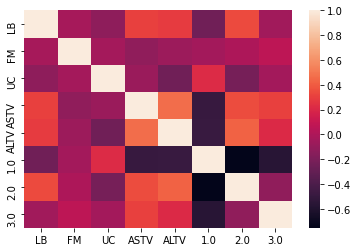

In [47]:
sns.heatmap(merged_data.corr())

<Figure size 720x720 with 0 Axes>

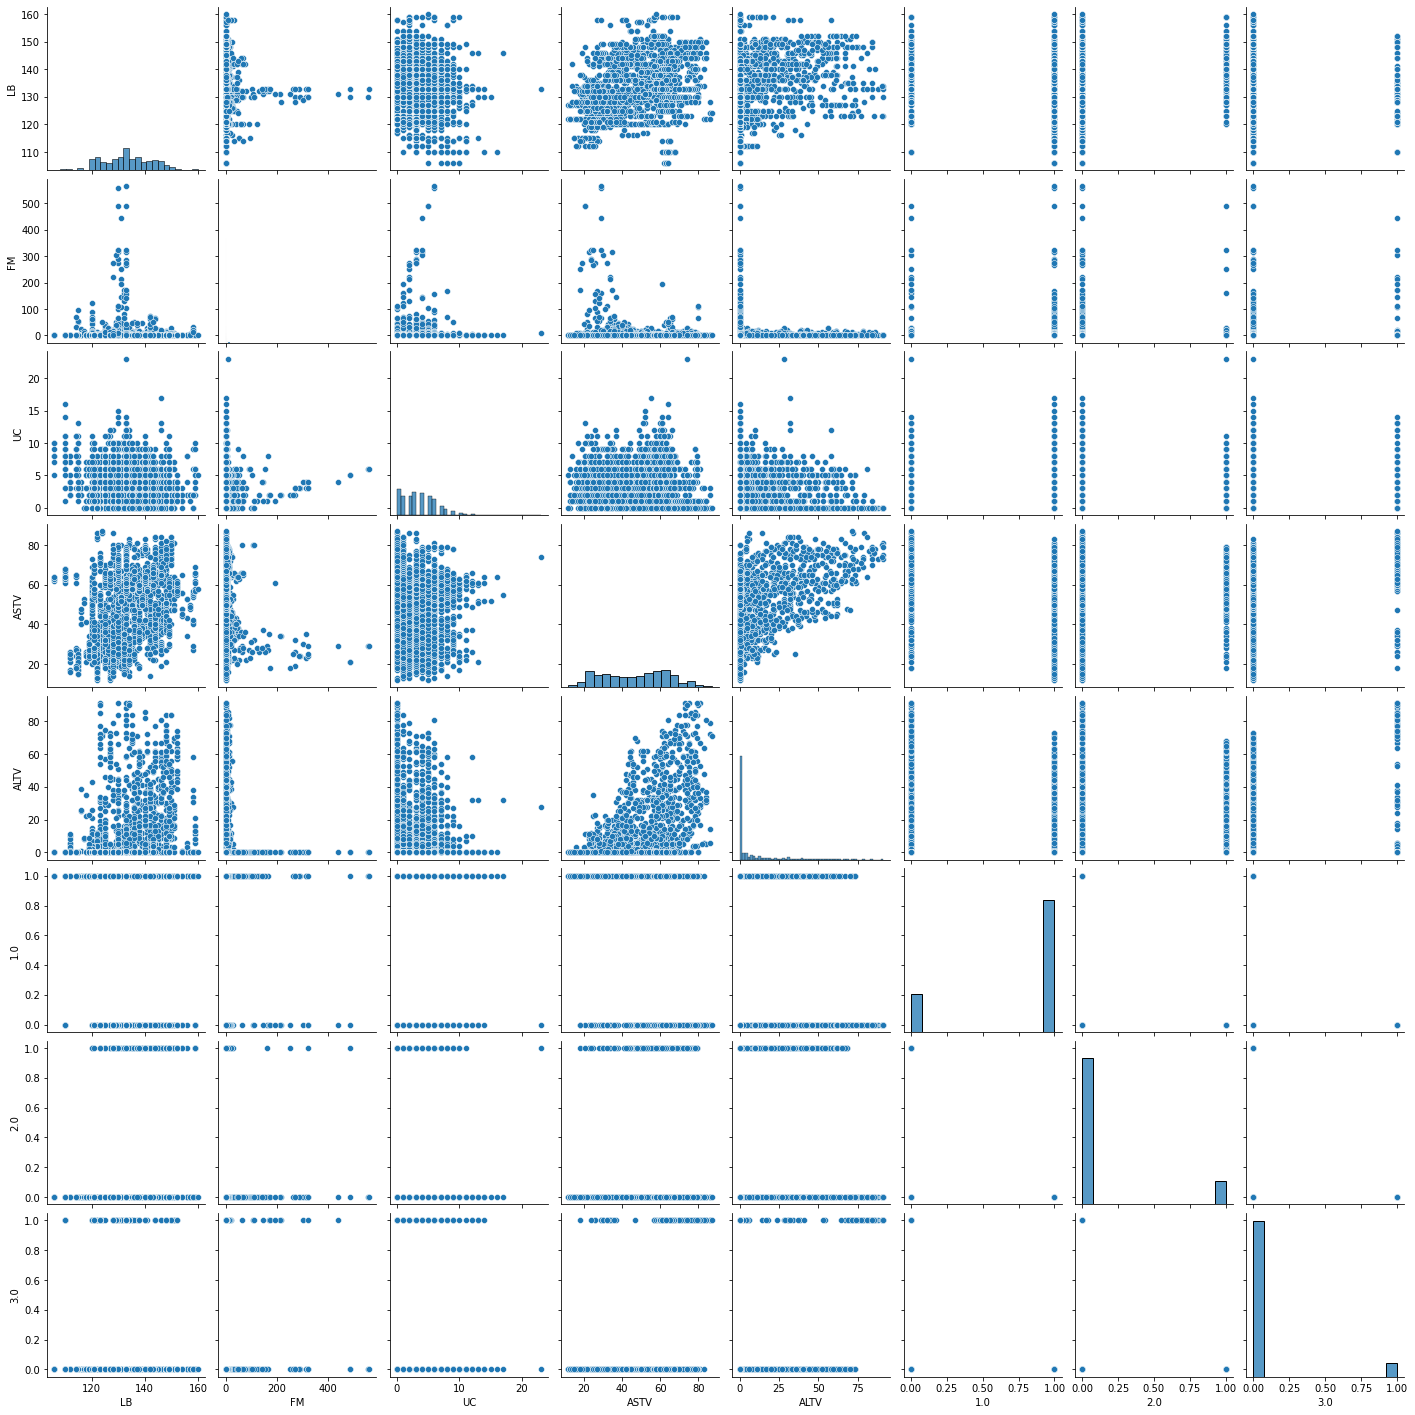

In [71]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
sns.pairplot(merged_data)

# Training model 

In [38]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hyperparameters)
hist = model.fit(x_train, y_train, validation_split=0.3, epochs=10, verbose=2)

Epoch 1/10
38/38 - 1s - loss: 11.0063 - accuracy: 0.7403 - val_loss: 12.7057 - val_accuracy: 0.7863 - 856ms/epoch - 23ms/step
Epoch 2/10
38/38 - 0s - loss: 9.4417 - accuracy: 0.7782 - val_loss: 7.1109 - val_accuracy: 0.7863 - 93ms/epoch - 2ms/step
Epoch 3/10
38/38 - 0s - loss: 7.1245 - accuracy: 0.7782 - val_loss: 6.7949 - val_accuracy: 0.7863 - 99ms/epoch - 3ms/step
Epoch 4/10
38/38 - 0s - loss: 7.0567 - accuracy: 0.7782 - val_loss: 6.7949 - val_accuracy: 0.7863 - 104ms/epoch - 3ms/step
Epoch 5/10
38/38 - 0s - loss: 7.0567 - accuracy: 0.7782 - val_loss: 6.7949 - val_accuracy: 0.7863 - 88ms/epoch - 2ms/step
Epoch 6/10
38/38 - 0s - loss: 7.0567 - accuracy: 0.7782 - val_loss: 6.7949 - val_accuracy: 0.7863 - 95ms/epoch - 2ms/step
Epoch 7/10
38/38 - 0s - loss: 7.0567 - accuracy: 0.7782 - val_loss: 6.7949 - val_accuracy: 0.7863 - 94ms/epoch - 2ms/step
Epoch 8/10
38/38 - 0s - loss: 7.0567 - accuracy: 0.7782 - val_loss: 6.7949 - val_accuracy: 0.7863 - 326ms/epoch - 9ms/step
Epoch 9/10
38/38 -

array([[120.,   0.,   0.,  73.,  43.],
       [132.,   0.,   4.,  17.,   0.],
       [133.,   0.,   5.,  16.,   0.],
       ...,
       [140.,   0.,   7.,  79.,  20.],
       [140.,   0.,   9.,  78.,  27.],
       [142.,   1.,   5.,  74.,  36.]])